In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sys import argv

pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

get_ipython().run_line_magic("matplotlib", "inline")

import matplotlib.pylab as plt
import pylab as pl
from matplotlib.ticker import FuncFormatter

from matplotlib.pyplot import figure

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)


import copy
import os

results_all = {}

In [ ]:
import os
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.ticker as ticker
import os
import glob


dfs = []
mydict = {}
datasets = [
    "bpic2012",
    "bpic2017",
    "trafficFines",
]  

durations = []
interventions = []

dicts = {}

durations2 = {}
interventions2 = {}


def millions(x, pos):
    "The two args are the value and tick position"
    return "%1.1fK" % (x * 1e-3)


def find_convergence(arr):
    convergence_point = None
    for i, value in enumerate(arr):
        if value > 0:
            if all(v > 0 for v in arr[i:]):
                convergence_point = i
                break
    return convergence_point


for dataset_name in datasets:
    if dataset_name == "bpic2012":
        sig = 12
    else:
        sig = 100

    # to obtain the elapsed intervention time
    durations2[dataset_name] = []

    # to collect how many interventions
    interventions2[dataset_name] = []

    # Run each expr three times
    iterations = [1, 2, 3]
    for it in iterations:
        dfs = []
        sum_gaines = {}
        gains = {}

        directory = os.path.join(
            "./resultsICPM/%s/%s/ResourcesResults_%s/resultsResources_%s/"
            % (dataset_name, dataset_name, dataset_name, it)
        )
        for root, dirs, files in os.walk(directory):
            title = root
            for dirr in dirs:
                path = directory + dirr
                csv_files = glob.glob(os.path.join(path, "*.csv"))
                for f in csv_files:
                    df = pd.read_csv(f, sep=";")
                    # nr of resources
                    df.name = str(f).split("/")[-1].split("_")[2]
                    dfs.append(df)
                    durations2[dataset_name].append(df[df.columns[-1]].iloc[0])
                    interventions2[dataset_name].append(df.shape[0])

        for df in dfs:
            gains[df.name] = gaussian_filter1d(df.gain, sigma=sig)

            convergence_index = find_convergence(gains[df.name])
            if convergence_index is None:
                print(f"Array {df.name} does not converge")
                sum_after_convergence = 0
            else:
                print(f"Array {df.name} converges at index {convergence_index}")

                # Calculate sum from convergence point to the end
                sum_after_convergence = np.sum(gains[df.name][convergence_index:])

            sum_gaines[df.name] = sum_after_convergence  # sum(df.gain)


        formatter = FuncFormatter(millions)
        print(sum_gaines)
        lists = sorted(
            sum_gaines.items(), key=lambda item: int(item[0])
        )  
        print(lists)

        x, y = zip(*lists)  # unpack a list of pairs into two tuples
        mydict[it] = lists
        fig, ax = plt.subplots()

        ax.plot(x[::], y[::], label="total gain", marker="s")

        for xs, ys in zip(x[::], y[::]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
            )

        plt.grid(True)
        ax.yaxis.set_major_formatter(formatter)
        plt.legend(loc="best")
        plt.ylabel("Total Gain")
        plt.xlabel("# Avaible Resources")
        plt.title("Total gain / resource")
        plt.tight_layout()
        plt.show()

    dicts[dataset_name] = [
        interventions2[dataset_name][0],
        1,
        round(np.mean(durations2[dataset_name], axis=0)),
    ]
    combined_tuples = []
    for k, v in mydict.items():
        [combined_tuples.append(tuple(sub)) for sub in v]

    # Create a dictionary to store the sum and count for each key
    sum_count_dict = {}
    for key, value in combined_tuples:
        if key not in sum_count_dict:
            sum_count_dict[key] = [value, 1]
        else:
            sum_count_dict[key][0] += value
            sum_count_dict[key][1] += 1

    # Calculate the average value for each key
    averages = {
        key: sum_value / count for key, (sum_value, count) in sum_count_dict.items()
    }

    # Print the average values for each key
    for key, average in averages.items():
        print(f"({key}, {average})")

    print(
        f"\nKey: {max(averages, key=averages.get)}, max: {averages[max(averages, key=averages.get)]}"
    )

    my_list = list(averages.items())

    x, y = zip(*my_list)  # unpack a list of pairs into two tuples
    fig, ax = plt.subplots()

    # ("%s - Total gain / resource"% dataset_name.upper())

    if dataset_name.startswith("tr"):
        pass
        ax.plot(x[::], y[::], marker="s")

        for xs, ys in zip(x[::3], y[::3]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
            )
        plt.xticks(x[::3], rotation=0)

    else:

        ax.plot(x[::], y[::], marker="s")

        for xs, ys in zip(x[::], y[::]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
            )

    plt.grid(True)
    ax.yaxis.set_major_formatter(formatter)
    plt.legend(loc="best")
    plt.ylabel("Total Gain")
    plt.xlabel("# Avaible Resources")
    plt.title("%s - Total gain / resource" % dataset_name.upper())
    plt.tight_layout()
    plt.show()

    results_all[dataset_name] = my_list
    results_all

In [4]:
# Extracted records post-simulation:
# {dataset: [# triggered interventions, Tdur, simulation duration]}
dicts

{'bpic2012': [1172, 1, 365],
 'bpic2017': [7852, 1, 3630],
 'trafficFines': [18352, 1, 1322]}

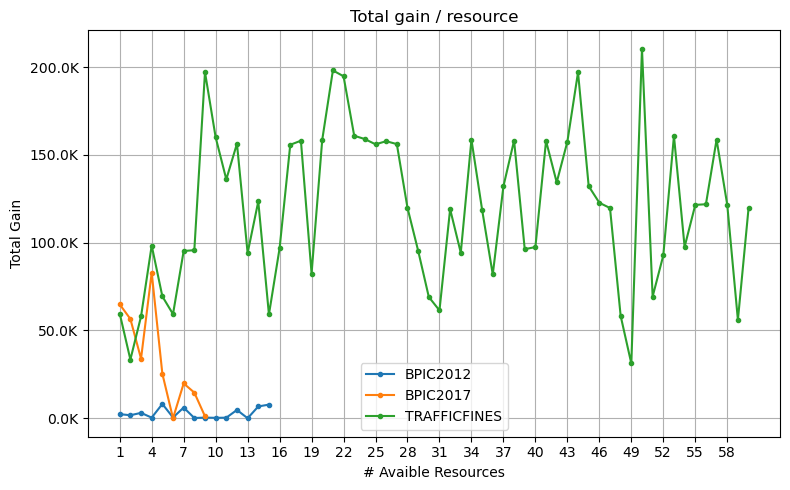

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

for k, v in results_all.items():
    my_list = v
    x, y = zip(*my_list)  # unpack a list of pairs into two tuples
    if k=="traficFines":
        k="trafficFines"
    else:
        pass

    ax.plot(x[::], y[::], label="%s" % k.upper(), marker=".")


plt.grid(True)
ax.yaxis.set_major_formatter(formatter)
plt.legend(loc="best")
plt.ylabel("Total Gain")
plt.xlabel("# Avaible Resources")
plt.title("Total gain / resource")
plt.xticks(x[::3], rotation=0) 
plt.tight_layout()

plt.show()




In [ ]:
keyss = []

resUtilzList = {}
resUtilz = {}

ll = []



i = 0
for k, v in dicts.items():
    resUtilz = {}
    dataset = k
    x, y = zip(*results_all[k])
    nrInterventions = v[0]
    tdur = v[1]
    elapsedTime = v[2]
    print(
        f"Data: {dataset}, inter: {nrInterventions}, tdur: {tdur}, time: {elapsedTime}"
    )

    for j in x:
        resUtilz[j] = "{:.1%}".format(
            ((nrInterventions * tdur) / (int(j) * elapsedTime))
        )
    resUtilzList[dataset] = resUtilz

    resUtilz = dict(sorted(resUtilz.items(), key=lambda item: int(item[0])))

    resUtilzList[k] = resUtilz

    keys = list(resUtilz.keys())
    values = list(resUtilz.values())

    combined_labels = [
        f"{key}\n\n{value}" for key, value in resUtilz.items()
    ]  
    combined_labels
    ll.append(combined_labels)
    keyss.append(keys)
    print(resUtilz)
    print("")

In [ ]:
heatmap_ranges_dicts = {}

for k, v in resUtilzList.items():
    heatmap_ranges_dicts[k] = []
    print(k)
    print(v)

    percentages = resUtilzList[k]
    # Convert percentage values to float
    percent_float = [float(val.strip("%")) for val in percentages.values()]
    print(percent_float)
    # Calculate threshold values
    if k == "bpic2017":
        pass
        thresholds = [np.inf, 90, 70, 50, 25]
    else:
        thresholds = [np.inf, 90, 75, 50, 25]

    # Create heatmap_ranges
    heatmap_ranges = [1]
    for threshold in thresholds[1:]:
        if threshold >= 90:
            continue
        try:

            heatmap_ranges.append(
                next(
                    idx - 1
                    for idx, val in enumerate(percent_float, start=1)
                    if val <= threshold
                )
            )
        except:
            pass

    heatmap_ranges_dicts[k] = heatmap_ranges

    print(heatmap_ranges)
    print("")

bpic2012
[1, 4, 6, 12]
[ 1.9  2.9  3.9  4.9  5.9  6.9  7.9  8.9  9.9 10.9 11.9 12.9 13.9 14.9
 15.9]


/tmp/ipykernel_37067/2956979916.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_37067/2956979916.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


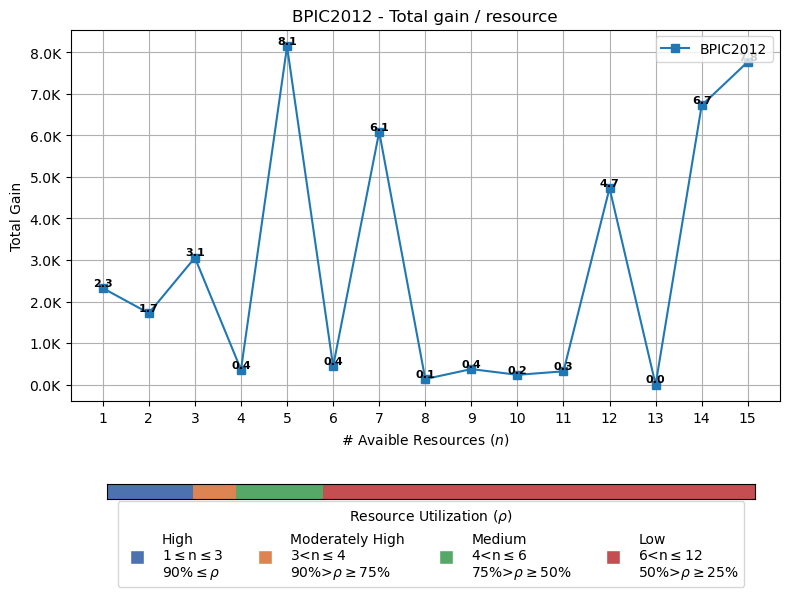

bpic2017
[1, 3, 4, 8]
[1.9 2.9 3.9 4.9 5.9 6.9 7.9 8.9 9.9]


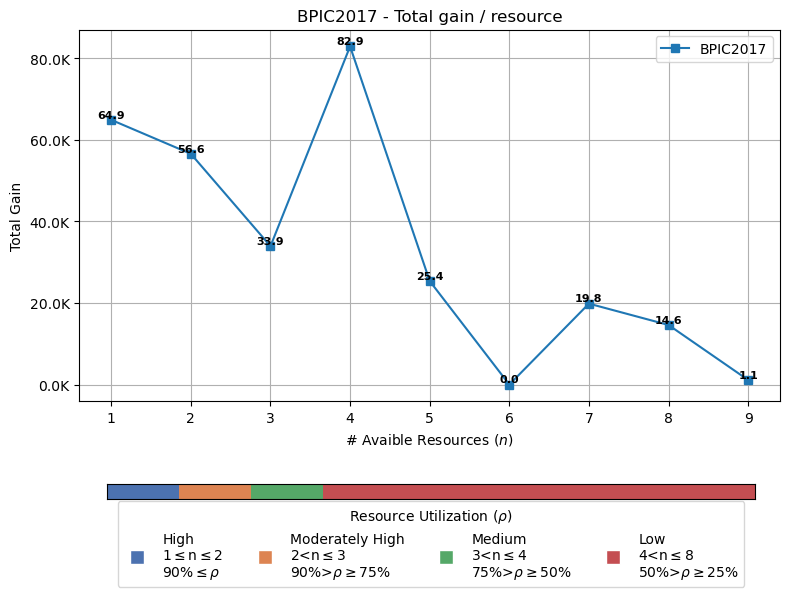

trafficFines
[1, 18, 27, 55]
[ 1.9  2.9  3.9  4.9  5.9  6.9  7.9  8.9  9.9 10.9 11.9 12.9 13.9 14.9
 15.9 16.9 17.9 18.9 19.9 20.9 21.9 22.9 23.9 24.9 25.9 26.9 27.9 28.9
 29.9 30.9 31.9 32.9 33.9 34.9 35.9 36.9 37.9 38.9 39.9 40.9 41.9 42.9
 43.9 44.9 45.9 46.9 47.9 48.9 49.9 50.9 51.9 52.9 53.9 54.9 55.9 56.9
 57.9 58.9 59.9 60.9]


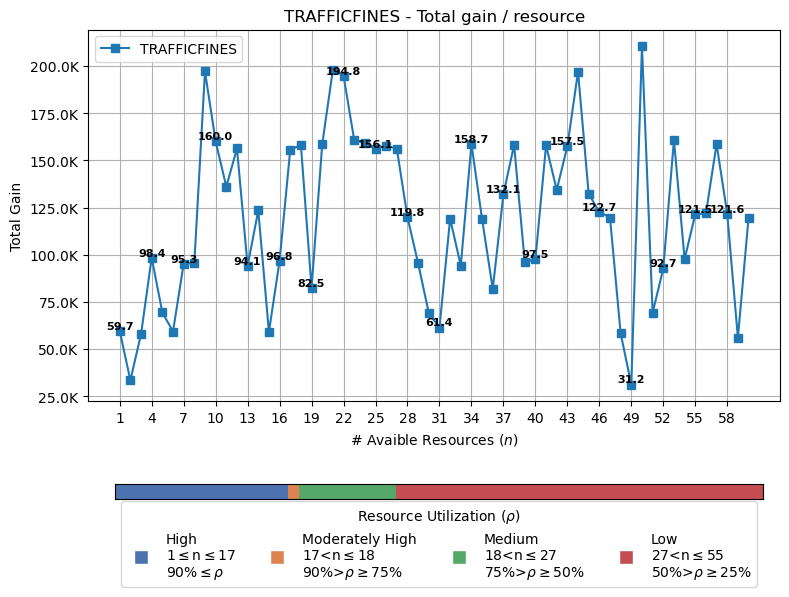

In [9]:
for k, heatmap_ranges in heatmap_ranges_dicts.items():
    print(k)
    print(heatmap_ranges)
    
    fig, ax = plt.subplots()

    import matplotlib.colors as mcolors

    
    x, y = zip(*results_all[k])

    if k=="traficFines":
        k="trafficFines"
    else:
        pass

    ax.plot(x[::], y[::], label="%s" % k.upper(), marker="s")
    if k.startswith("tr"):
        pass
        for xs, ys in zip(x[::3], y[::3]):
                pl.text(
                    xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
                    horizontalalignment='center',
             verticalalignment='bottom',
                )
    else:
        
        for xs, ys in zip(x[::], y[::]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
                horizontalalignment='center',
         verticalalignment='bottom',
            )

    

    plt.grid(True)
    ax.yaxis.set_major_formatter(formatter)
    plt.legend(loc="best")
    plt.ylabel("Total Gain")
    plt.subplots_adjust(bottom=-.6)  # Adjust this value to reduce the space
    plt.xlabel("# Avaible Resources ($n$)\n\n")
    if k.startswith("tr"):
        plt.xticks(x[::3], rotation=0) 
    else:
        plt.xticks(x[::], rotation=0)
    plt.title("%s - Total gain / resource"% k.upper())
    plt.tight_layout()



    heatmap_ranges = heatmap_ranges#[1, 10, 20, 40, 50]

    # Create data for the heatmap bar
    heatmap_data = np.arange(1.9, len(x)+1)
    print(heatmap_data)

    heatmap_colors = ["lightsteelblue", "lightblue", "silver", "antiquewhite",]
    heatmap_labels = [f"High\n${heatmap_ranges[0]}$$\\leq$n$\\leq${heatmap_ranges[1]-1}\n90%$\\leq$$\\rho$",
                      f"Moderately High\n${heatmap_ranges[1]-1}$<n$\\leq${heatmap_ranges[1]}\n90%>$\\rho\geq$75%",
                      f"Medium\n${heatmap_ranges[1]}$<n$\\leq${heatmap_ranges[2]}\n75%>$\\rho\geq$50%",
                      f"Low\n${heatmap_ranges[2]}$<n$\\leq${heatmap_ranges[3]}\n50%>$\\rho\geq$25%",]
    heatmap_ranges = heatmap_ranges

    # Create a colormap
    import  seaborn as sns
    sns.color_palette()#
    cmap =mcolors.ListedColormap(heatmap_colors)
    heatmap_ranges_BoundaryNorm = [heatmap_ranges[0], 
                                   heatmap_ranges[1]-1,
                                   heatmap_ranges[1], 
                                   heatmap_ranges[2], 
                                   heatmap_ranges[3],
                                  ]
    norm = mcolors.BoundaryNorm(heatmap_ranges_BoundaryNorm, cmap.N)
    palette = sns.color_palette("deep", n_colors=len(heatmap_ranges))

    cmap = mcolors.ListedColormap(palette)
    # Create proxy artists for the legend
    proxy_artists = [
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label)
        for color, label in zip(palette, heatmap_labels)
    ]
    if k.startswith("tra"):
        heatmap_ax = fig.add_axes([0.15, -0.01, 0.81, 0.03])  # Adjust the y-coordinate and other values as needed
        heatmap_ax.imshow([heatmap_data], cmap=cmap, norm=norm,
                          aspect="auto", extent=[0, int(heatmap_ranges[-1]), 0, 1])
        legend = plt.legend(handles=proxy_artists, 
                        bbox_to_anchor=[0.5, -3], loc='center', 
                         title='Resource Utilization ($\\rho$)', ncol=4, )
    else:
        heatmap_ax = fig.add_axes([0.14, -0.01, 0.81, 0.03])  # Adjust the y-coordinate and other values as needed

        heatmap_ax.imshow([heatmap_data], cmap=cmap, norm=norm,
                          aspect="auto", extent=[0, int(heatmap_ranges[-1]), 0, 1])
        legend = plt.legend(handles=proxy_artists, 
                        bbox_to_anchor=[0.5, -3], loc='center', 
                         title='Resource Utilization ($\\rho$)', ncol=4, )

    heatmap_ax.set_yticks([])
    heatmap_ax.set_xticks([])


    
    plt.tight_layout()
    plt.show()









In [10]:
heatmap_ranges_dicts

{'bpic2012': [1, 4, 6, 12],
 'bpic2017': [1, 3, 4, 8],
 'trafficFines': [1, 18, 27, 55]}